In [2]:
import pandas as pd
dataset = pd.read_csv("data10.txt")
# dataset = dataset.drop_duplicates()
dataset = dataset[dataset["status"]!="pause"]
data = dataset[["xa1","xa2","xb1","xb2","xc1","xc2","xd1","xd2","ya1","ya2","yb1","yb2"]]
target = dataset["status"]
target.value_counts()

straight    3015
right       1337
left         793
Name: status, dtype: int64

In [3]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(data,target)

In [6]:
predicted = clf.predict([[97,542,61,564,0,588,13,641,-1,474,-1,473]])
predicted

array(['straight'], dtype=object)

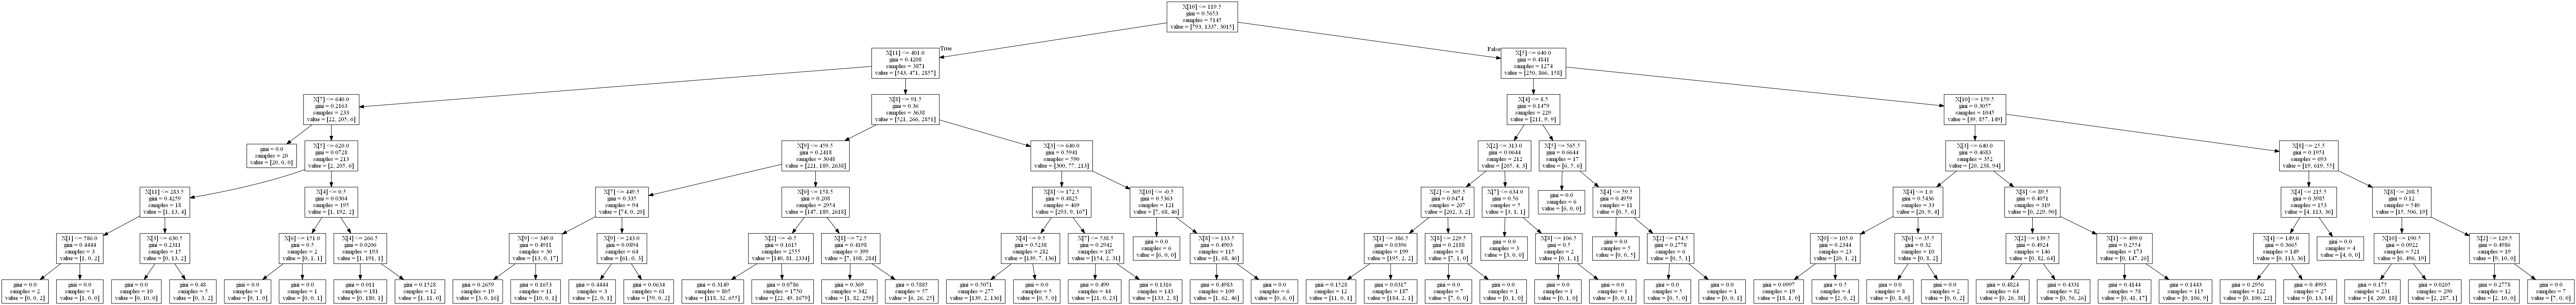

In [14]:
tree.export_graphviz(clf, out_file="tree.dot",
                         filled=True, rounded=True)
# 作成した決定木を可視化 (pydotplus パッケージを利用)
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image
Image(graph.create_png())


AttributeError: 'DecisionTreeClassifier' object has no attribute 'show_tree'